# plotting monthly trajectories

loading : ../data/som/weu/era-int/qtuv.700.MM.weu_7x11_II.vis
loaded timesteps: 444  years: 37  SOM columns: 7  SOM rows: 11


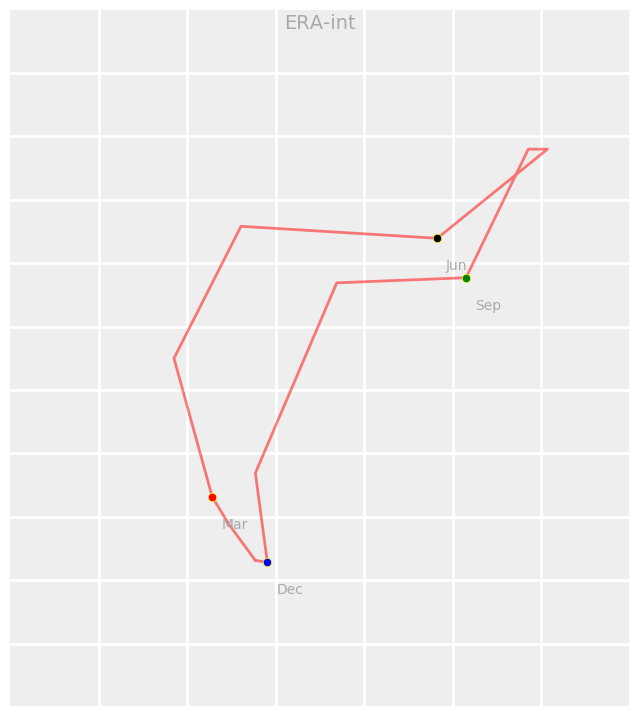

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import formatplot

#this is vis file that has SOM node ocurrence for monthly data
visfile="../data/som/weu/era-int/qtuv.700.MM.weu_7x11_II.vis"
#this is position of the first january in the time series. If ts starts with january, then it is 0
firstjanuary=0

print "loading :", visfile
with open(visfile, "r") as inpf:
    visdata=np.array([x.strip().split() for x in inpf.readlines()[1:]]).astype("float32")[:,0:2]
nts=visdata.shape[0]
nyears=nts/12
nx=int(np.max(visdata[:,0])+1)
ny=int(np.max(visdata[:,1])+1)
print "loaded timesteps:",nts," years:", nyears, " SOM columns:", nx, " SOM rows:", ny
asom=(visdata[:,1]*nx+visdata[:,0])
asom_hist=np.histogram(asom, bins=nx*ny, range=[0,nx*ny])
asom_freq=np.array(asom_hist[0]/float(nts)).reshape([ny,nx])
temp=visdata.reshape([nyears,12,2])
evis_mean=np.mean(temp, 0)

climind=range(12)+[0] #indices to plot a climatological progression, need to wrap, i.e. connect last month back to the first one, thus 0

#formatplot.myformat("neat")
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['axes.facecolor'] = 'eeeeee'
matplotlib.rcParams['axes.labelcolor'] = '666666'
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.linewidth'] = 0
matplotlib.rcParams['axes.titlesize'] = 10
matplotlib.rcParams['grid.color'] = 'white'
matplotlib.rcParams['grid.linestyle'] = '-'
matplotlib.rcParams['grid.linewidth'] = 2
matplotlib.rcParams['xtick.color'] = '666666'
matplotlib.rcParams['xtick.major.size'] = 0
matplotlib.rcParams['xtick.minor.size'] = 0
matplotlib.rcParams['ytick.color'] = '666666'
matplotlib.rcParams['ytick.major.size'] = 0
matplotlib.rcParams['ytick.minor.size'] = 0
        
fig=plt.figure(figsize=(8,9))
pl = fig.add_subplot(1, 1, 1)
pl.plot(evis_mean[climind,0],evis_mean[climind,1], linewidth=2, color="red", alpha=0.5)
#these plot points showing postion of D,M,J and S

moninds=[2,5,8,11]
monnames=["Mar", "Jun", "Sep", "Dec"]
mcols=["red", 'black', "green", "blue"]
for i in range(len(moninds)):
    mi=(firstjanuary+moninds[i])%12
    pl.plot(evis_mean[mi,0],evis_mean[mi,1], linewidth=0, marker="o", color=mcols[i], mec="yellow")#march
    pl.text(evis_mean[mi,0]+0.1,evis_mean[mi,1]+0.5, monnames[i], fontsize=10, color="darkgrey")
#this plots all nodes for a month
#    pl.plot(temp[:,mi,0],temp[:,mi,1], linewidth=0, marker="o", color=mcols[i], markersize=6, markeredgecolor="lightblue", alpha=0.3)

#this assumes that the vis file holds data with first month being January
yticks=[y+0.5 for y in range(ny)]
xticks=[x+0.5 for x in range(nx)]

pl.yaxis.set_ticks(yticks)
pl.xaxis.set_ticks(xticks)
pl.set_xticklabels([])
pl.set_yticklabels([])
pl.set_xlim([-0.5,nx-0.5])
pl.set_ylim([ny-0.5,-0.5])

pl.text(3,-0.2, "ERA-int", horizontalalignment='center', color="darkgrey", fontsize=14)

fig.savefig("trajectory_test.jpg")
plt.show()
